# Úkol - příprava dat, základní statistická analýza

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

Pro tento příklad budeme používat podmnožinu s tohoto souboru.

!!! Vytvořený subset nemusí statisticky odpovídat původnímu souboru

## Sub dataset
- Data  = struktura s vyplněnými daty
- m      = počet řádků = 100
- x’s    = vstupní proměnná / features
- y’s    = výstupní promměná / target
- (x, y) = jeden řádek z training dataset
- x(2)   = (4, 5, 3374, 85)
- y(2)   = 1 050 000

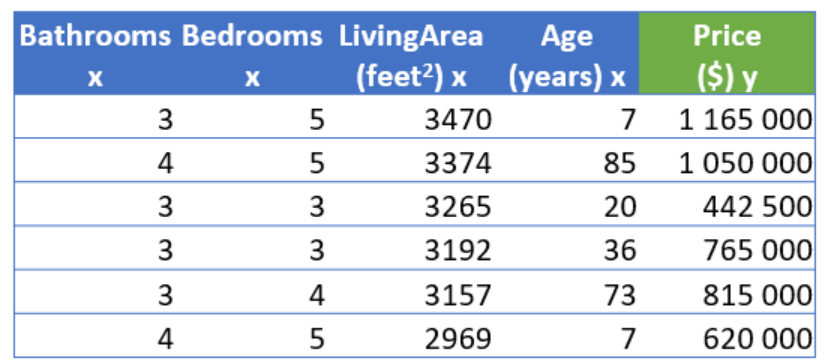

# Úkol

- Proveďte statistickou analýzu dat
- Vizualizujte data
- Vyberte vhodné proměnné pro lineární model
- Standardizujte data

## Čtení dat z CSV souboru

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv ("../dataset/portland_filtered.csv",  sep=';')

## Základní charakteristiky data
- náhled dat
- zobrazení základních statistik (průměr, minimum, maximum, ...)
- kontrola NaN hodnot

## Distribuce dat
- grafy s distribucí dat
- boxplot grafy
- popsat, jaká jsou data (vychýlené hodnoty, ...)

## Vztahy mezi daty
- pairplot
- korelační tabulka
- Určit, které sloupce jsou lineárně závislé, vhodné pro vysvětlení price

## Standardizace dat

Každá funkce má jinou střední, standardní odchylku.

Standardizační centrum a funkce měřítka.

důvody:
* zabránit tomu, aby některé funkce modelu dominovaly
* může pomoci rychleji konvergovat modely strojového učení
* může usnadnit interpretaci koeficientů modelu strojového učení

Výpočet:
* x_new = (x – střední hodnota) / směrodatná_odchylka
* průměr = součet (x) / počet (x)
* směrodatná_odchylka = sqrt( součet ( (x – průměr)^2 ) / počet (x))

- proveďte standardizaci sloupců použitelných pro linární regresi
- zobrazte rozložení původních a standardizovaných dat

## 1. Základní charakteristiky

In [5]:
df

,bathrooms,bedrooms,livingArea,age,price
0,3,5,3470,7,1165000
1,4,5,3374,85,1050000
2,3,3,3265,20,442500
3,3,3,3192,36,765000
4,3,4,3157,73,815000
...,...,...,...,...,...
95,1,3,838,72,250000
96,1,2,832,47,260000
97,1,2,812,46,220000
98,1,2,810,97,546500


In [6]:
df.describe()

,bathrooms,bedrooms,livingArea,age,price
count,100.000000,100.000000,100.000000,100.00000,1.000000e+02
mean,2.380000,3.260000,1974.080000,49.88000,5.196074e+05
std,0.838228,0.860115,663.629851,32.77973,1.722241e+05
min,1.000000,1.000000,766.000000,3.00000,1.650000e+05
25%,2.000000,3.000000,1530.000000,20.00000,4.125000e+05
50%,2.000000,3.000000,1859.000000,47.50000,5.000000e+05
75%,3.000000,4.000000,2490.250000,75.25000,5.995312e+05
max,5.000000,6.000000,3470.000000,114.00000,1.165000e+06


In [7]:
df.isna().sum()

bathrooms     0
bedrooms      0
livingArea    0
age           0
price         0
dtype: int64

## 2. Distribuce dat
- grafy s distribucí dat
- boxplot grafy
- popsat, jaká jsou data (vychýlené hodnoty, ...)

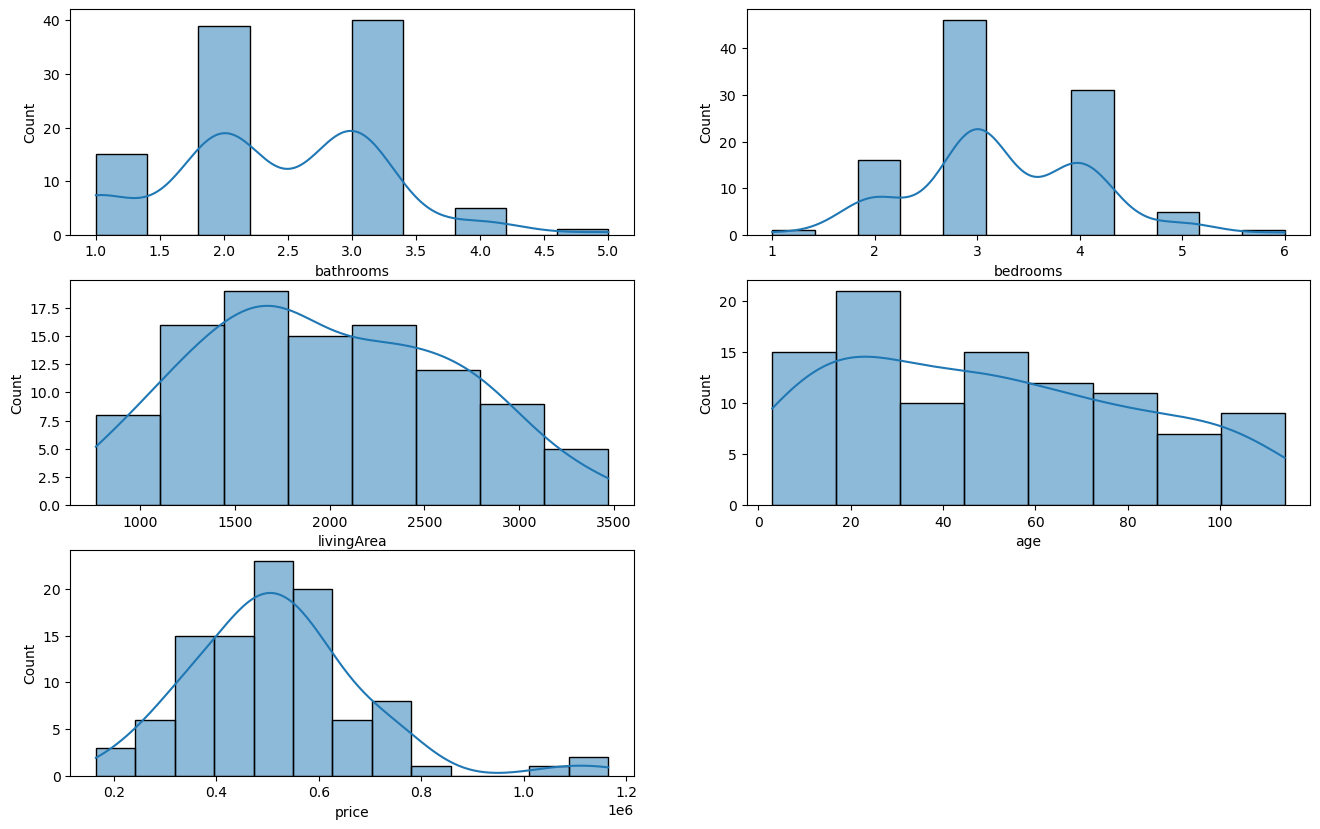

In [8]:
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(df[i], ax=ax, kde=True)

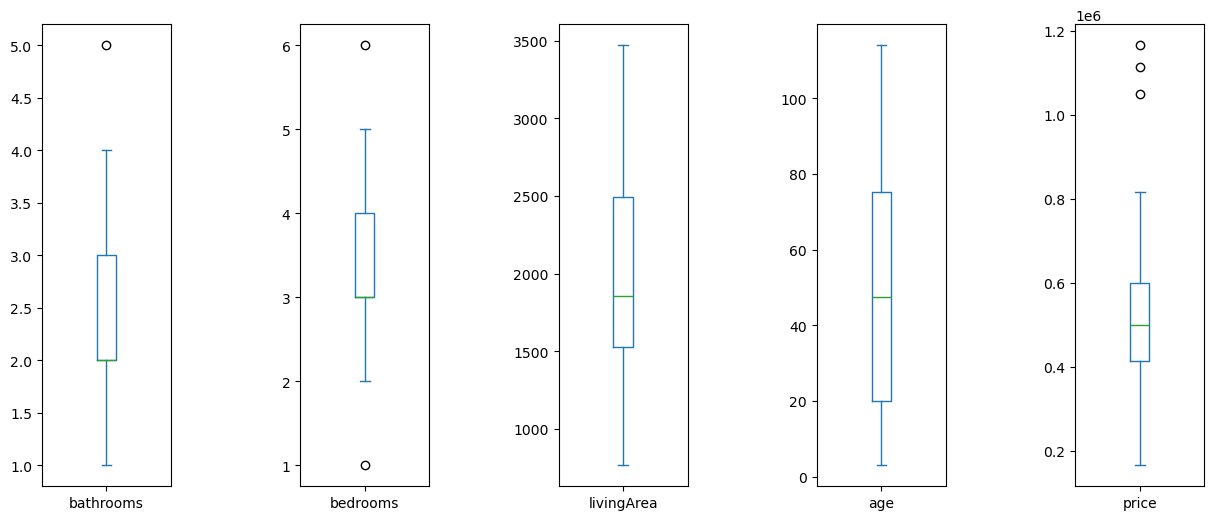

In [9]:
df.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()

### Popis dat
- age se pohybuje mezi 0-114, což naznačuje různý věk budov.
- price je široce rozptýleno mezi 165 000 a 1 165 000.

### Vychýlené hodnoty
- bathrooms a bedrooms mají několik outlierů v horní části (5 a 6).
- livingArea nemá výrazné outliery, ale horní hodnoty mohou mít vliv.
- age má široký rozsah, ale bez extrémních hodnot.
- price má několik výjimečně vysokých hodnot nad 1 milion.




## 3. Vztahy mezi daty
- pairplot
- korelační tabulka
- Určit, které sloupce jsou lineárně závislé, vhodné pro vysvětlení price

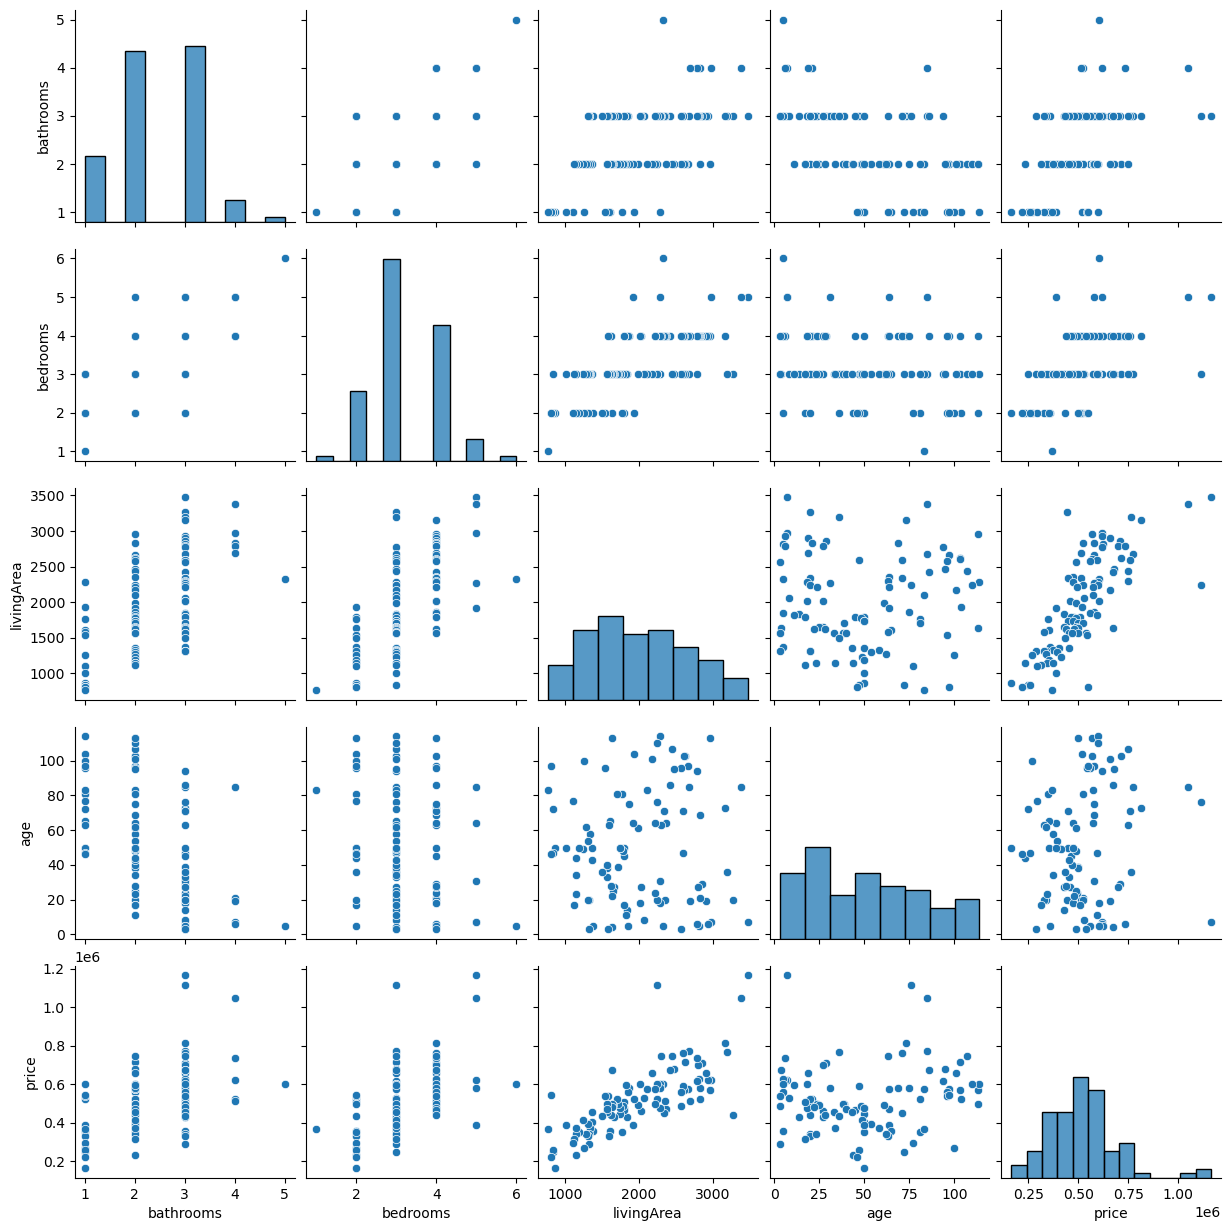

In [10]:
sns.pairplot(df)

In [11]:
corr = df.corr()
corr

,bathrooms,bedrooms,livingArea,age,price
bathrooms,1.000000,0.618132,0.566558,-0.536517,0.463856
bedrooms,0.618132,1.000000,0.641684,-0.224947,0.498934
livingArea,0.566558,0.641684,1.000000,0.019381,0.759973
age,-0.536517,-0.224947,0.019381,1.000000,0.114328
price,0.463856,0.498934,0.759973,0.114328,1.000000


<Axes: >

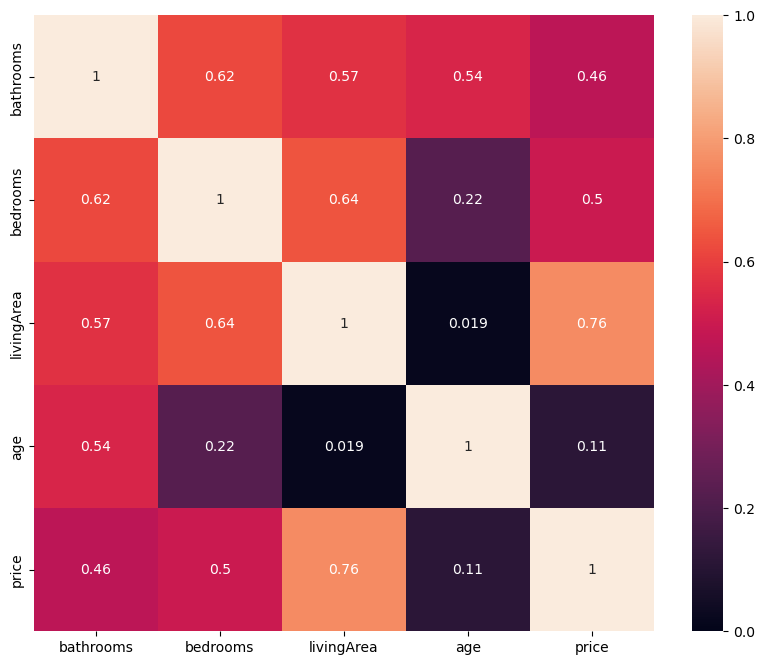

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

### Lineárně závislé proměnné 
- living area
- bedrooms
- price

## 4. Standardizace dat
- living area, age, price

In [13]:
df['age_std'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['living_area_std'] = (df['livingArea'] - df['livingArea'].mean()) / df['livingArea'].std()
df['price_std'] = (df['price'] - df['price'].mean()) / df['price'].std()

<Axes: xlabel='age_std', ylabel='Count'>

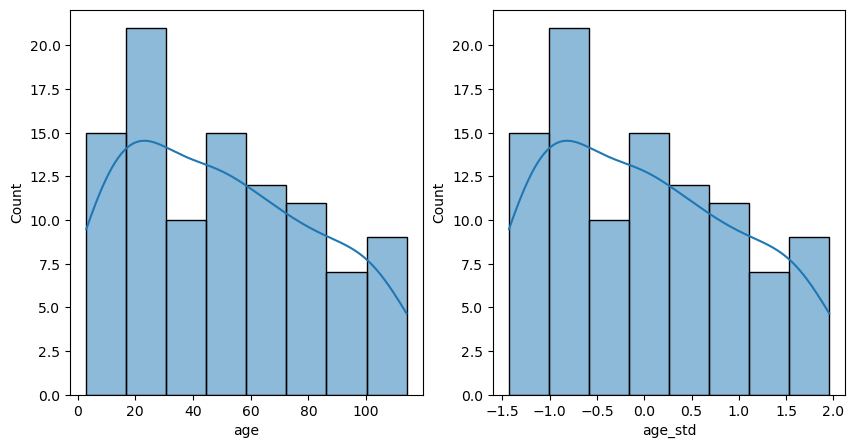

In [14]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)           
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(df['age'],ax=ax1, kde=True)
sns.histplot(df['age_std'],ax=ax2, kde=True)

<Axes: xlabel='living_area_std', ylabel='Count'>

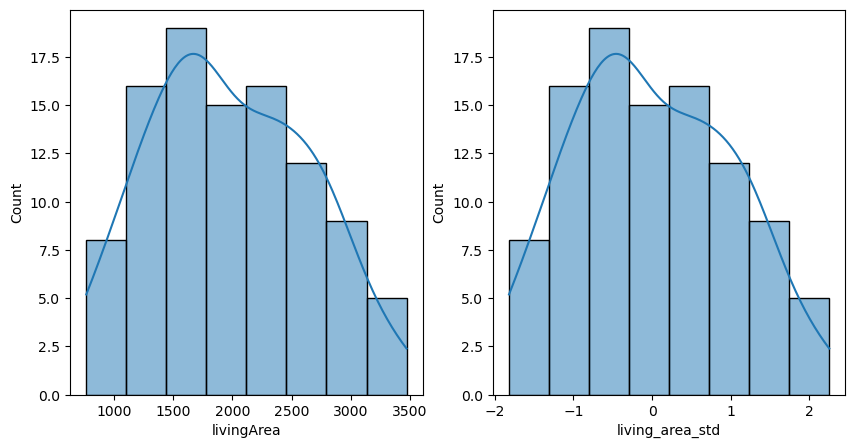

In [15]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)           
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(df['livingArea'],ax=ax1, kde=True)
sns.histplot(df['living_area_std'],ax=ax2, kde=True)

<Axes: xlabel='price_std', ylabel='Count'>

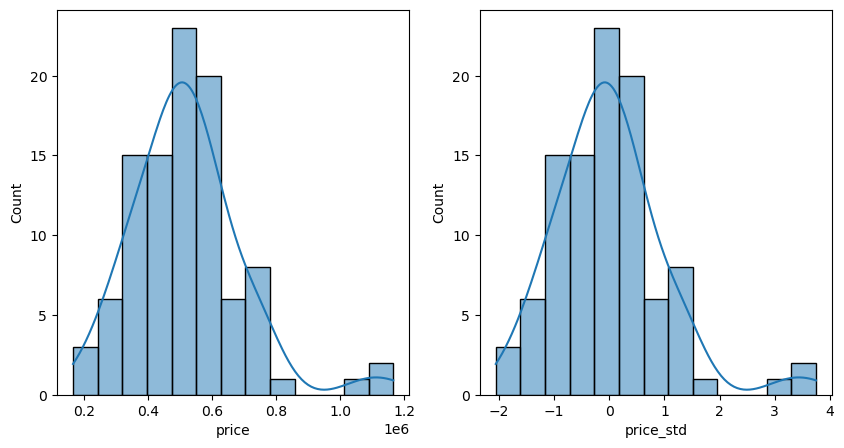

In [16]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)           
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(df['price'],ax=ax1, kde=True)
sns.histplot(df['price_std'],ax=ax2, kde=True)